# Time Series Analysis - ARIMA Model.

Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

Let's go through these steps!

In [1]:
### Importing the required libraries and statmodels

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = (15,6)

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading and reading the data.....
df = pd.read_csv('AirPassengers.csv')
print('Dimensions:',df.shape)
df.head()

Dimensions: (144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
### Changing column name from #Passengers to 'Passengers'...
df.columns = ['Month','Passengers']
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
### Converting  Month column to Datetime...
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
### Setting Month column as index 
df.set_index('Month', inplace = True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
### Getting a breif statistical summary of the dataset....
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


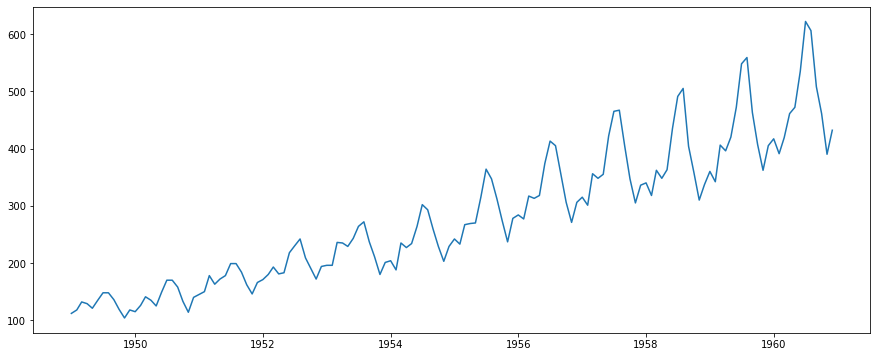

In [7]:
### Plotting the time series 
ts = df['Passengers']
plt.plot(ts)

In [ ]:
#Ho => Null Hypothesis => Time series is notstationary..
#H1 => Alternate Hypothesis => Time series is stationary..

In [8]:
### Importing adfuller, acf, pacf and ARIMA

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

In [9]:
####  Creating a function for testing stationarity using adfuller test..

def test_stationarity(timeseries):
    #Determing rolling statistics
    rollingmean = timeseries.rolling(window=52,center=False).mean() 
    rollingstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orignal = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    


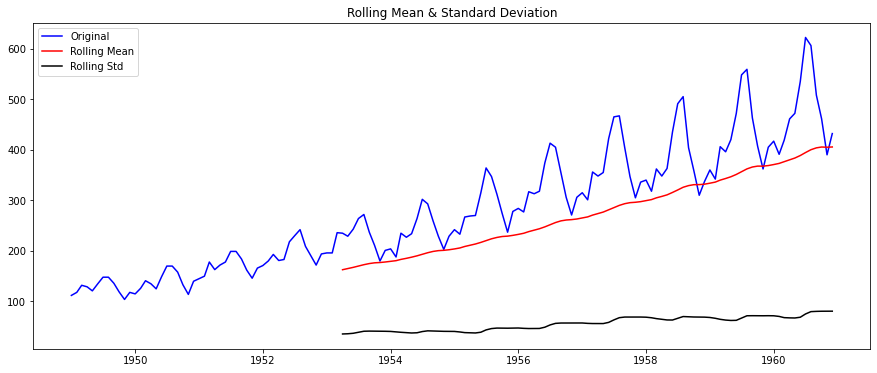

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
### Testing the time series...
test_stationarity(ts)

In [ ]:
## The P value (0.99 > 0.05), Hence we may not reject the Null Hypothesis ans the timeseries is not Stationary.

In [11]:
## Log tttransformation of time Series...
ts_log = np.log(ts)

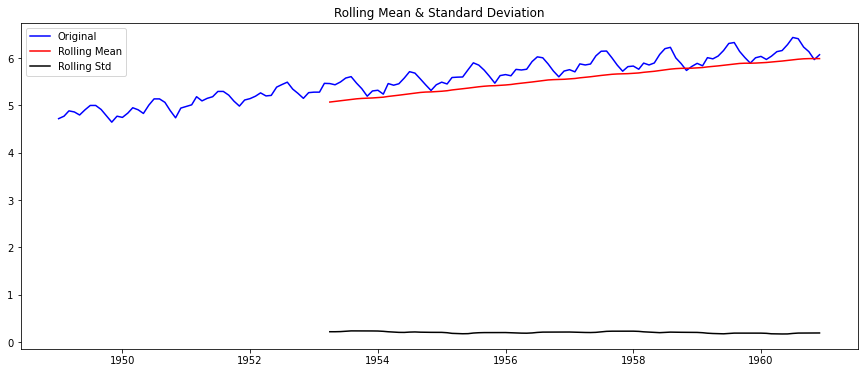

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
### Testing after log transformation
test_stationarity(ts_log)

In [ ]:
## The P value is still (0.422 > 0.05),Hence Null Hypothesis remains and the time series is not stationary...

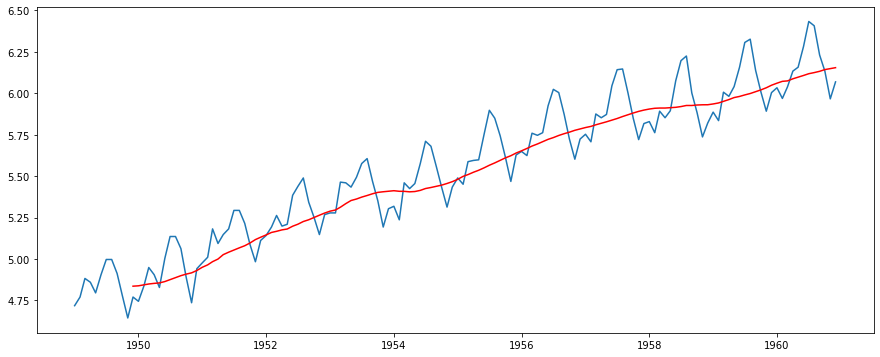

In [13]:
### Calculating the Moving Average and Moving STD...

movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [14]:
# Get the difference between the moving average and the actual number of passengers
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: Passengers, dtype: float64

In [15]:
### dropping  Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
Name: Passengers, dtype: float64

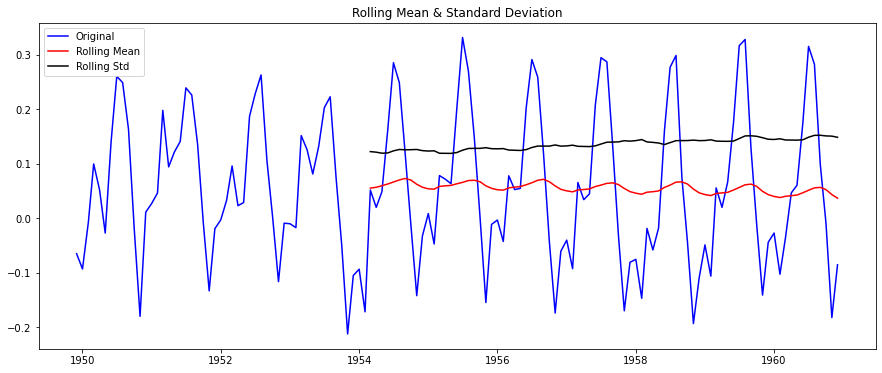

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [16]:
### testing again ...
test_stationarity(ts_log_mv_diff)

In [ ]:
### The Pvalue is now(0.02 < 0.05), Hence NUll can be rejected  and the Time series is "Stationary"

# Autocorrelation(ACF) and Partial Autocorrelation(PACF)

Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

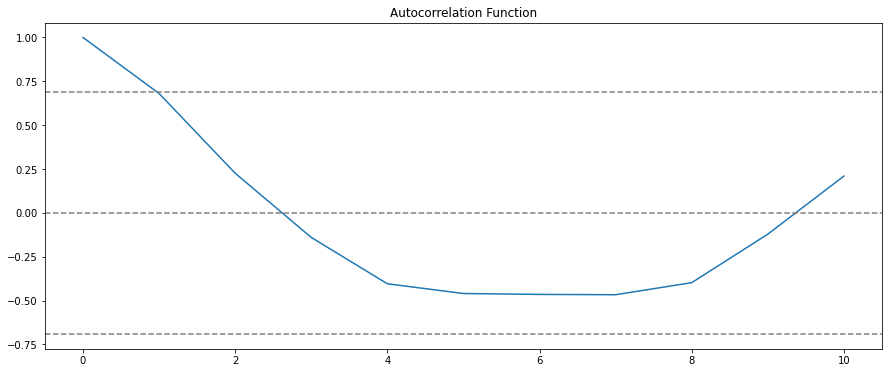

In [17]:
### Plotting ACF:

plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

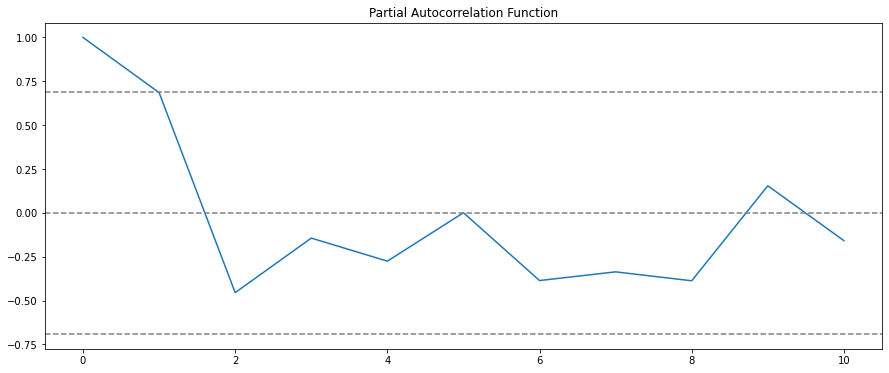

In [18]:
### Plotting PCAF:
plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
# The PACF curve drops to 0 between lag values 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2.

C:\Users\imtiyaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\imtiyaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: nan')

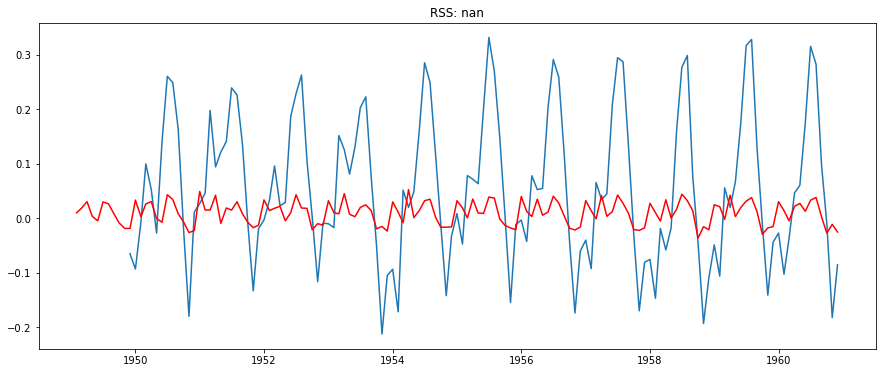

In [19]:
### ARIMA Model

model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

In [20]:
### Predictions :

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009676
1949-03-01    0.018164
1949-04-01    0.030130
1949-05-01    0.003154
1949-06-01   -0.005039
dtype: float64

In [21]:
### Calculating the cumulative sum of predictions ..
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009676
1949-03-01    0.027839
1949-04-01    0.057969
1949-05-01    0.061123
1949-06-01    0.056084
dtype: float64

In [22]:
### Logtransformation ...

predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780360
1949-03-01    4.910641
1949-04-01    4.917781
1949-05-01    4.856913
dtype: float64

Text(0.5, 1.0, 'RMSE: 626.8502')

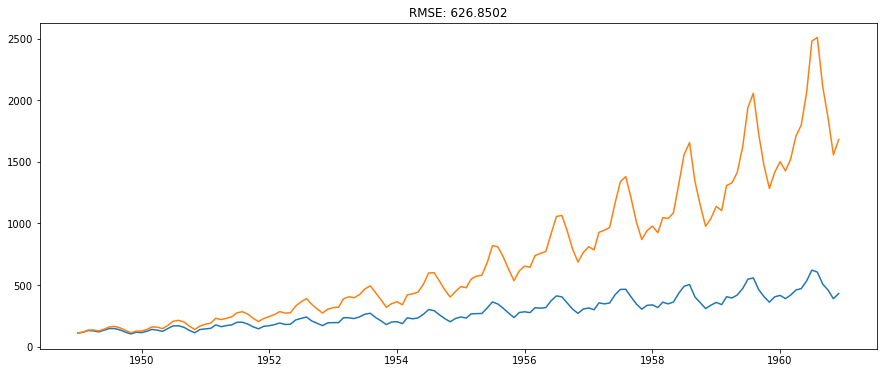

In [23]:
### forecast :

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
### The orange curve is prediction which has an RMSE of 626.8502 .

# Beer Production In Australia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading and reading the data.....
df = pd.read_csv('monthly-beer-production-in-austr.csv')
print('Dimensions:',df.shape)
df.head()

Dimensions: (476, 2)


,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
### Changing column name as its too long..
df.columns = ['Month','Production']
df.head()

,Month,Production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
### converting it yo datetime dtype
df['Month'] = pd.to_datetime(df['Month'])
df.info()                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       476 non-null    datetime64[ns]
 1   Production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [5]:
### Setting Month column as index 
df.set_index('Month',inplace = True)
df.head()

,Production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


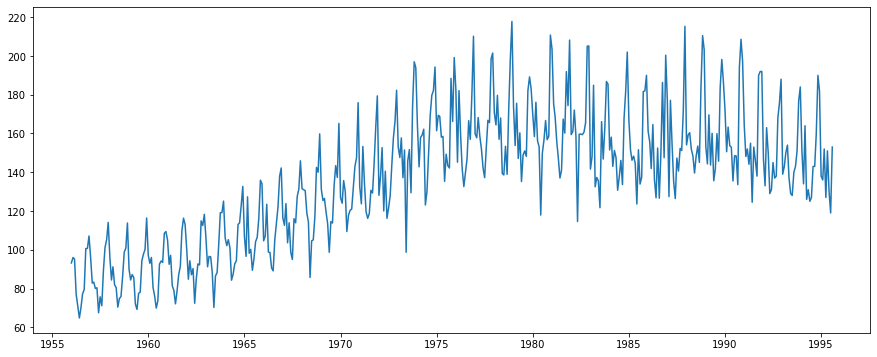

In [6]:
### Plotting the time series 
ts = df['Production']
plt.plot(ts)

In [7]:
#Ho => Null Hypothesis => Time series is notstationary..
#H1 => Alternate Hypothesis => Time series is stationary..

In [8]:
### Importing adfuller, acf, pacf and ARIMA

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

In [9]:
### Creating a function to test stationarity by Dickey fuller Test....

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rollingmean = timeseries.rolling(window=52,center=False).mean() 
    rollingstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orignal = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

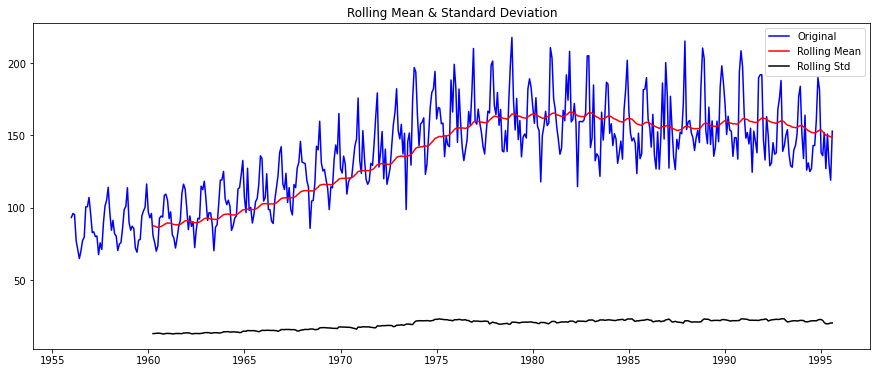

Results of Dickey-Fuller Test:
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [10]:
### testing the data...
test_stationarity(ts)

In [ ]:
## The P value (0.177 > 0.05), Hence we may not reject the Null Hypothesis ans the timeseries is not Stationary.

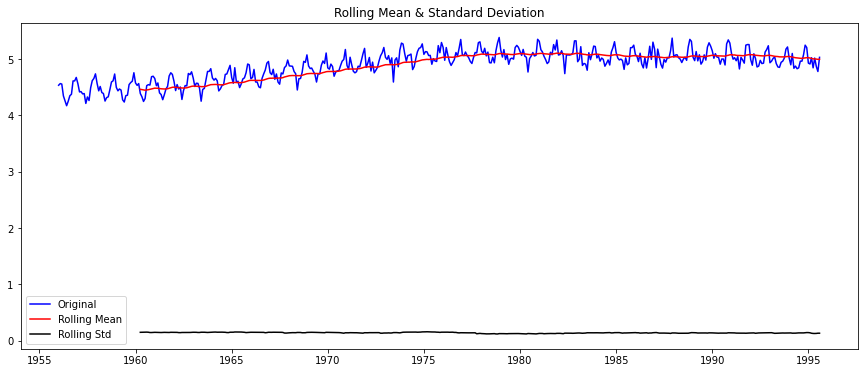

Results of Dickey-Fuller Test:
Test Statistic                  -2.800769
p-value                          0.058164
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [11]:
### log transformation...
ts_log = np.log(ts)
test_stationarity(ts_log)

In [ ]:
## The P value is still (0.058 > 0.05),Hence Null Hypothesis remains and the time series is not stationary...

In [12]:
### Calculating the Moving Average and  Moving Standard Deviation..

movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()

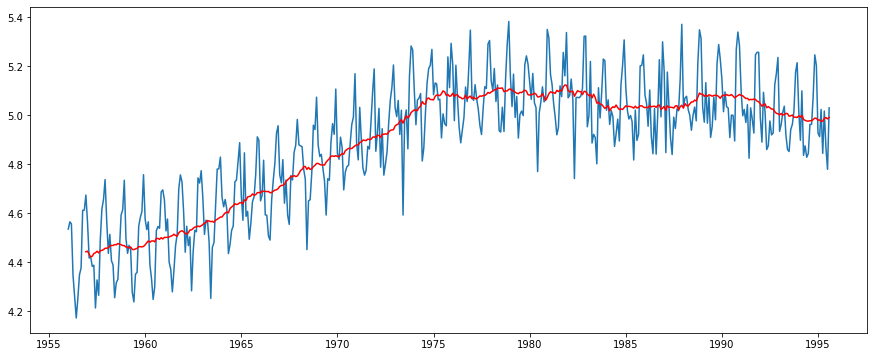

In [13]:
### Plotting the Moving Average...
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [14]:
### Difference b/w log transformed time series and Moving Average...
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

Month
1956-01-01        NaN
1956-02-01        NaN
1956-03-01        NaN
1956-04-01        NaN
1956-05-01        NaN
1956-06-01        NaN
1956-07-01        NaN
1956-08-01        NaN
1956-09-01        NaN
1956-10-01        NaN
1956-11-01        NaN
1956-12-01    0.23183
Name: Production, dtype: float64

In [15]:
### Dropping the NaN values...
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1956-12-01    0.231830
1957-01-01    0.118994
1957-02-01   -0.015558
1957-03-01    0.001590
1957-04-01   -0.041908
1957-05-01   -0.047399
1957-06-01   -0.225688
1957-07-01   -0.117442
1957-08-01   -0.173166
1957-09-01    0.045062
Name: Production, dtype: float64

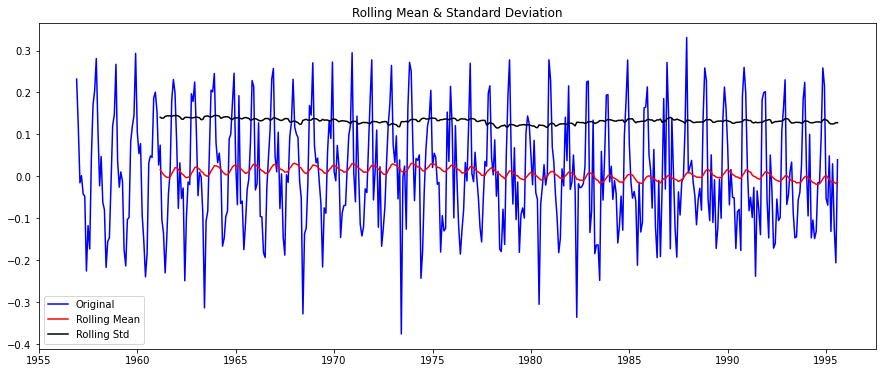

Results of Dickey-Fuller Test:
Test Statistic                  -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [16]:
### testing again ...
test_stationarity(ts_log_mv_diff)

In [ ]:
### The Pvalue is now(0.009 < 0.05), Hence NUll can be rejected  and the Time series is "Stationary"

# Autocorrelation(ACF) and Partial Autocorrelation(PACF)

Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

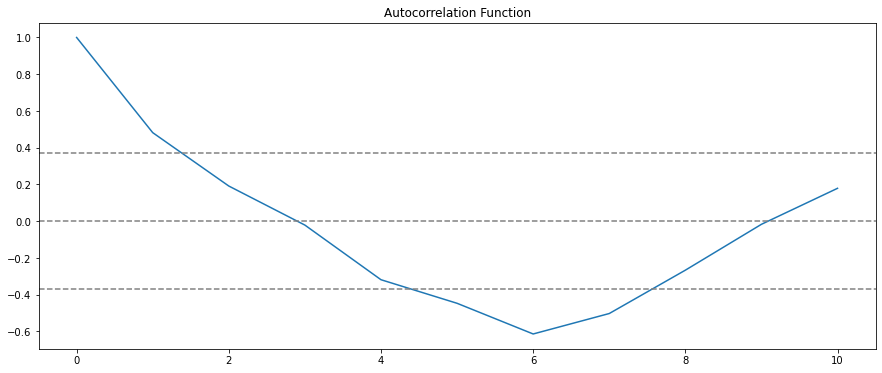

In [17]:
### plotting ACF: 
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

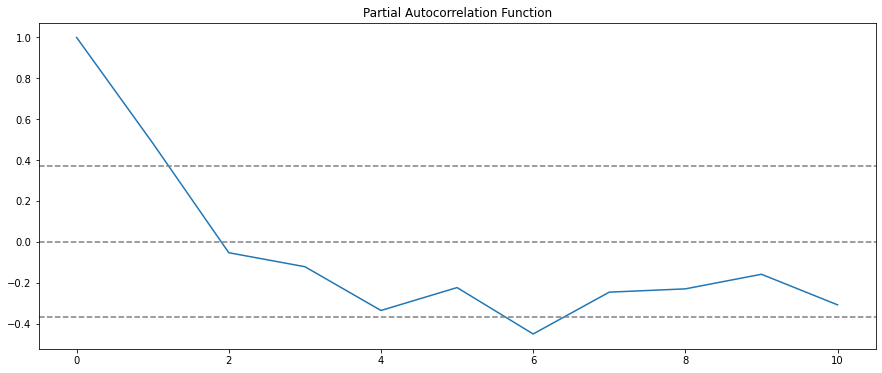

In [18]:
###Plotting PACF:

plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [19]:
## The PACF curve drops to 0 between lag values 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2.

C:\Users\imtiyaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\imtiyaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: nan')

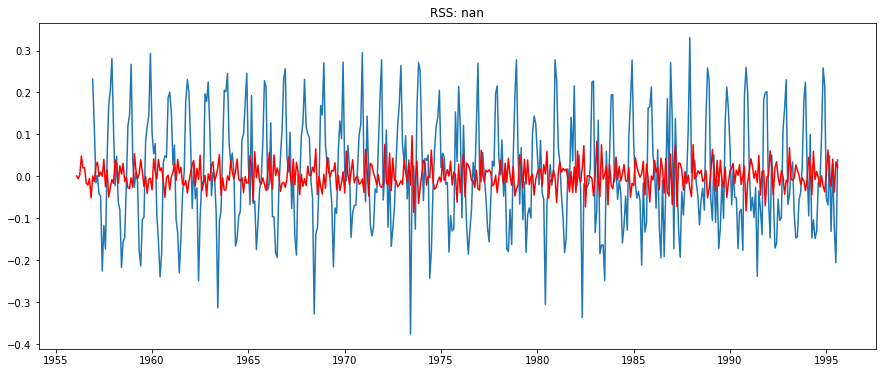

In [20]:
### ARIMA Model:

model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

In [21]:
### Predictions :

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1956-02-01    0.000936
1956-03-01   -0.005458
1956-04-01    0.003012
1956-05-01    0.048189
1956-06-01    0.019847
dtype: float64

In [22]:
### Calculating the cumulative sum of predictions ...

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1956-02-01    0.000936
1956-03-01   -0.004522
1956-04-01   -0.001510
1956-05-01    0.046680
1956-06-01    0.066527
dtype: float64

In [23]:
### log transformation :

predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.565285
1956-03-01    4.551458
1956-04-01    4.343594
1956-05-01    4.307950
dtype: float64

Text(0.5, 1.0, 'RMSE: 41.3004')

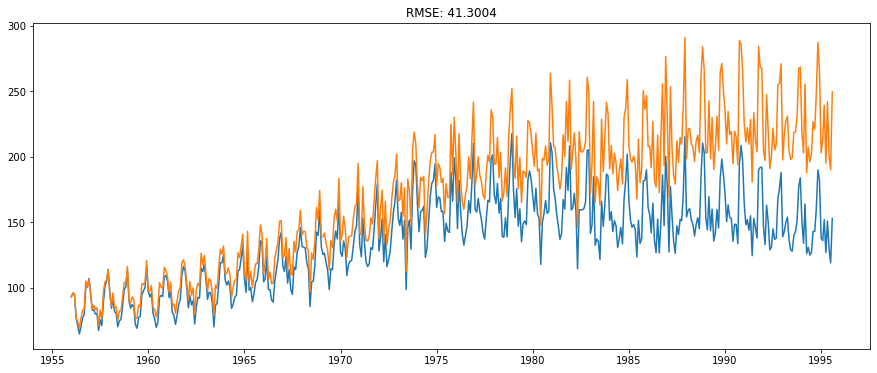

In [24]:
### Forecast :

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
####  The orange curve is our prediction which has an RMSE of 41.3004.